<a href="https://colab.research.google.com/github/MohamedHatemWaheed/netflix-stocks-analysis-and-prediction/blob/main/STOCKS_FINAL_PROJ_NTI_INVIDUAL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Scrapping data from yahoo finance website for Netflix Stocks from 2010 until now**

In [ ]:
!pip install yfinance
import yfinance as yf
from datetime import datetime

# تحديد التاريخ النهائي كـ تاريخ اليوم الحالي
end_date = datetime.today().strftime('%Y-%m-%d')

# تحميل بيانات Netflix من 2010 لحد اليوم الحالي
netflix = yf.download('NFLX', start='2010-01-01', end=end_date)

# عرض أول 5 صفوف للتأكيد
print(netflix.head())

# حفظ البيانات في ملف CSV
netflix.to_csv('netflix_stock_data.csv')


/tmp/ipython-input-295603038.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  netflix = yf.download('NFLX', start='2010-01-01', end=end_date)
[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open    Volume
Ticker          NFLX      NFLX      NFLX      NFLX      NFLX
Date                                                        
2010-01-04  7.640000  7.961429  7.565714  7.931429  17239600
2010-01-05  7.358571  7.657143  7.258571  7.652857  23753100
2010-01-06  7.617143  7.672857  7.197143  7.361429  23290400
2010-01-07  7.485714  7.757143  7.462857  7.731429   9955400
2010-01-08  7.614286  7.742857  7.465714  7.498571   8180900


# **Understanding Data**

In [ ]:
df = pd.read_csv("netflix_stock_data.csv")

In [ ]:
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,NFLX,NFLX,NFLX,NFLX,NFLX
1,Date,NaN,NaN,NaN,NaN,NaN
2,2010-01-04,7.639999866485596,7.961429119110107,7.565713882446289,7.931428909301758,17239600
3,2010-01-05,7.3585710525512695,7.6571431159973145,7.258571147918701,7.652856826782227,23753100
4,2010-01-06,7.617143154144287,7.67285680770874,7.197143077850342,7.361429214477539,23290400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926 entries, 0 to 3925
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   3926 non-null   object
 1   Close   3925 non-null   object
 2   High    3925 non-null   object
 3   Low     3925 non-null   object
 4   Open    3925 non-null   object
 5   Volume  3925 non-null   object
dtypes: object(6)
memory usage: 184.2+ KB


In [ ]:
df.describe(include="O")

,Price,Close,High,Low,Open,Volume
count,3926,3925,3925,3925,3925,3925
unique,3926,3834,3801,3804,3769,3870
top,2025-08-08,51.871429443359375,15.0,125.75,365.0,2922700
freq,1,3,4,3,5,2


# **Data preprocessing**

In [ ]:
# 2. changing first column name from price to it's correct title date
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

# removing secod & third row index (1,2)
df.drop(index=[1, 2], inplace=True)

# 4.resorting idex
df.reset_index(drop=True, inplace=True)
#5 i will remove the row whoose index is 0
df.drop(index=0, inplace=True)


print(df.head())


         Date               Close                High                Low  \
1  2010-01-05  7.3585710525512695  7.6571431159973145  7.258571147918701   
2  2010-01-06   7.617143154144287    7.67285680770874  7.197143077850342   
3  2010-01-07   7.485713958740234   7.757143020629883  7.462856769561768   
4  2010-01-08   7.614285945892334   7.742856979370117  7.465713977813721   
5  2010-01-11   7.604286193847656   7.704286098480225  7.528571128845215   

                Open    Volume  
1  7.652856826782227  23753100  
2  7.361429214477539  23290400  
3  7.731429100036621   9955400  
4  7.498570919036865   8180900  
5  7.659999847412109   6783700  


In [ ]:
# 5.fixing date data type
df['Date'] = pd.to_datetime(df['Date'])

# sorting data depends on date
df.sort_values('Date', inplace=True)

In [ ]:
# @title Converting relevant columns to numeric
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

In [ ]:
#@title *Fetaure Engenering*' adding new calculated columns

# SMA (Simple Moving Average)
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# EMA (Exponential Moving Average)
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

# Daily Return
df['Daily_Return'] = df['Close'].pct_change()

# RSI (Relative Strength Index)
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
# Avoid division by zero for RSI calculation
rs = avg_gain / avg_loss.replace(0, pd.NA)
df['RSI'] = 100 - (100 / (1 + rs))

# MACD (Moving Average Convergence Divergence)
ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema_12 - ema_26

In [ ]:
df

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,Daily_Return,RSI,MACD
1,2010-01-05,7.358571,7.657143,7.258571,7.652857,23753100,NaN,NaN,7.358571,NaN,NaN,0.000000
2,2010-01-06,7.617143,7.672857,7.197143,7.361429,23290400,NaN,NaN,7.383197,0.035139,NaN,0.020627
3,2010-01-07,7.485714,7.757143,7.462857,7.731429,9955400,NaN,NaN,7.392960,-0.017254,NaN,0.026068
4,2010-01-08,7.614286,7.742857,7.465714,7.498571,8180900,NaN,NaN,7.414039,0.017176,NaN,0.040290
5,2010-01-11,7.604286,7.704286,7.528571,7.660000,6783700,NaN,NaN,7.432158,-0.001313,NaN,0.050177
...,...,...,...,...,...,...,...,...,...,...,...,...
3919,2025-08-04,1170.989990,1177.000000,1162.619995,1167.650024,2244700,1214.657001,1231.284402,1203.073245,0.010694,32.052099,-22.060536
3920,2025-08-05,1147.869995,1171.709961,1144.709961,1171.000000,2660700,1208.284998,1230.482402,1197.815793,-0.019744,30.441412,-23.549446
3921,2025-08-06,1178.479980,1181.380005,1151.869995,1153.520020,3362200,1202.794995,1230.344202,1195.974287,0.026667,32.189245,-22.005779
3922,2025-08-07,1180.369995,1191.219971,1168.199951,1181.760010,2628300,1199.283997,1229.720203,1194.488164,0.001604,42.978744,-20.394805


✅ ليه في NaN في الأعمدة زي SMA، RSI، MACD؟
🟡 1. SMA و EMA:
لما تقول تحسب SMA_20، إنت بتطلب "المتوسط البسيط لـ 20 يوم".

فـ أول 19 صف مش هيبقى فيهم قيمة، لأن مفيش 20 قيمة سابقة لسه.

نفس الفكرة مع SMA_50، أول 49 صف هيكون فيهم NaN.

🟣 2. RSI (Relative Strength Index):
بيتحسب على 14 يوم (rolling window = 14).

فلازم تعدي أول 13 يوم من غير نتيجة.

🔵 3. MACD:
بيعتمد على EMA 12 و EMA 26.

فـ أول 25 صف هتشوف قيم ناقصة برضه.

✅ يعني القيم دي هتبدأ تظهر تدريجيًا بعد أول X صفوف
المؤشر	يظهر بعد كم صف
SMA_20	بعد الصف 19
SMA_50	بعد الصف 49
EMA_20	بيبدأ يظهر مباشرة، لكن يكون أدق بعد شوية
RSI	بعد الصف 13
MACD	بعد الصف 25 تقريبًا



In [ ]:
# droping nulls
df.dropna(inplace=True)
df
# hena ana 3amkt drop yo3tabr ly awel 50 row 3shan nukll besbb 7esbet el sma 50

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,Daily_Return,RSI,MACD
50,2010-03-17,10.131429,10.248571,10.057143,10.128571,4390400,9.734500,8.746171,9.699660,0.004106,69.393714,0.374748
51,2010-03-18,10.077143,10.161429,10.062857,10.101429,3593100,9.766214,8.800543,9.735611,-0.005358,66.471015,0.360226
52,2010-03-19,10.064286,10.128571,10.010000,10.100000,9905700,9.793357,8.849486,9.766914,-0.001276,53.723950,0.343718
53,2010-03-22,10.412857,10.428571,10.007143,10.050000,7216300,9.847786,8.908029,9.828432,0.034634,66.581828,0.354673
54,2010-03-23,10.422857,10.498571,10.290000,10.428571,4979100,9.909286,8.964200,9.885044,0.000960,75.934825,0.360012
...,...,...,...,...,...,...,...,...,...,...,...,...
3919,2025-08-04,1170.989990,1177.000000,1162.619995,1167.650024,2244700,1214.657001,1231.284402,1203.073245,0.010694,32.052099,-22.060536
3920,2025-08-05,1147.869995,1171.709961,1144.709961,1171.000000,2660700,1208.284998,1230.482402,1197.815793,-0.019744,30.441412,-23.549446
3921,2025-08-06,1178.479980,1181.380005,1151.869995,1153.520020,3362200,1202.794995,1230.344202,1195.974287,0.026667,32.189245,-22.005779
3922,2025-08-07,1180.369995,1191.219971,1168.199951,1181.760010,2628300,1199.283997,1229.720203,1194.488164,0.001604,42.978744,-20.394805


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3874 entries, 50 to 3923
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3874 non-null   datetime64[ns]
 1   Close         3874 non-null   float64       
 2   High          3874 non-null   float64       
 3   Low           3874 non-null   float64       
 4   Open          3874 non-null   float64       
 5   Volume        3874 non-null   int64         
 6   SMA_20        3874 non-null   float64       
 7   SMA_50        3874 non-null   float64       
 8   EMA_20        3874 non-null   float64       
 9   Daily_Return  3874 non-null   float64       
 10  RSI           3874 non-null   float64       
 11  MACD          3874 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 393.5 KB


In [ ]:
# @title extracting Data after feature enginering and cleaning
df.to_csv("preprocessed_data.csv", index=False)

In [ ]:
#@title checking for any outliers and elimniating it by cliping
#here i replace any value above the max ad down the min as this wil be outlier so i replace it by the max value it can be depedns on the IQR MAX

# Detect numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Loop through each numeric column
for col in numeric_cols:
    # Save original column before clipping
    original_col = df[col].copy()

    # Calculate IQR bounds
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Clip the column
    df[col] = df[col].clip(lower=lower, upper=upper)

    # Optional recheck: count outliers after clipping
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} → Outliers After Clipping: {len(outliers)}")


Close → Outliers After Clipping: 0
High → Outliers After Clipping: 0
Low → Outliers After Clipping: 0
Open → Outliers After Clipping: 0
Volume → Outliers After Clipping: 0
SMA_20 → Outliers After Clipping: 0
SMA_50 → Outliers After Clipping: 0
EMA_20 → Outliers After Clipping: 0
Daily_Return → Outliers After Clipping: 0
RSI → Outliers After Clipping: 0
MACD → Outliers After Clipping: 0


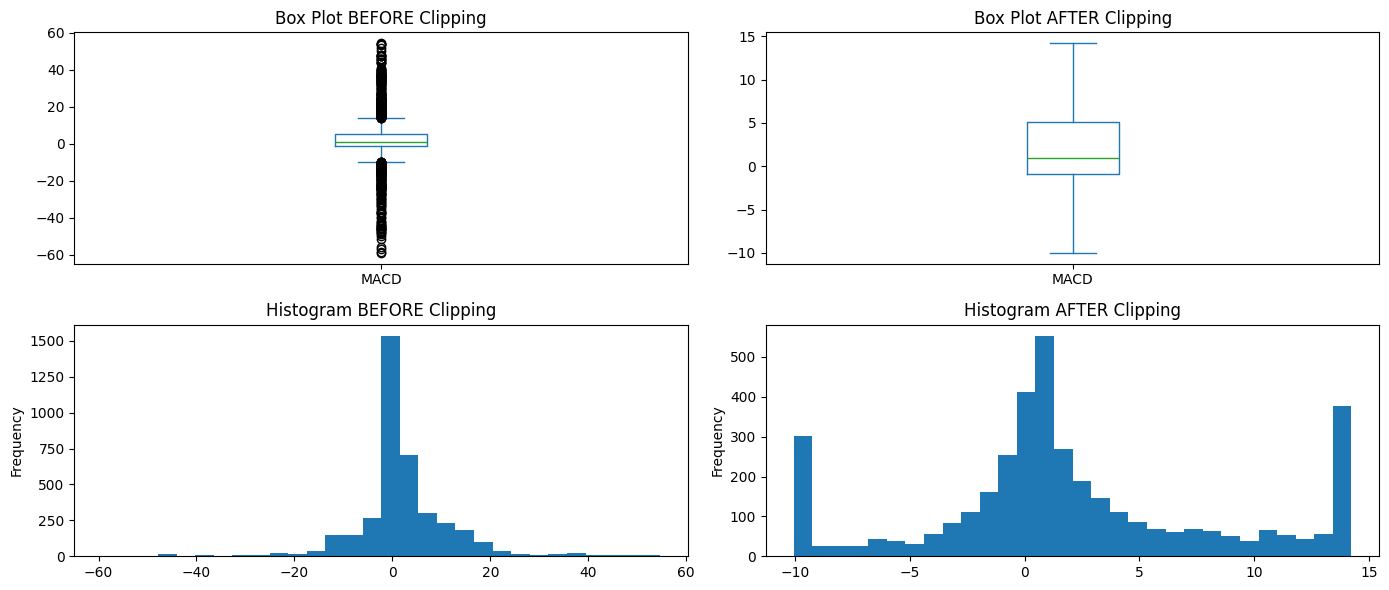

In [ ]:
# Now plot comparison
plt.figure(figsize=(14,6))

# Boxplot comparison
plt.subplot(2,2,1)
original_col.plot(kind='box')
plt.title('Box Plot BEFORE Clipping')

plt.subplot(2,2,2)
df[col].plot(kind='box')
plt.title('Box Plot AFTER Clipping')

# Histogram comparison
plt.subplot(2,2,3)
original_col.plot(kind='hist', bins=30)
plt.title('Histogram BEFORE Clipping')

plt.subplot(2,2,4)
df[col].plot(kind='hist', bins=30)
plt.title('Histogram AFTER Clipping')

plt.tight_layout()
plt.show()


In [ ]:
df.describe()

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,Daily_Return,RSI,MACD
count,3874,3874.000000,3874.000000,3874.000000,3874.000000,3.874000e+03,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000
mean,2017-11-24 03:55:39.803820544,264.072302,267.980487,259.790067,264.007539,1.433163e+07,261.483700,257.795278,261.733232,0.001395,54.168416,2.033659
min,2010-03-17 00:00:00,7.685714,7.925714,7.544286,7.712857,1.144000e+06,8.078714,8.393743,8.153718,-0.053323,2.540857,-10.040717
25%,2014-01-21 06:00:00,48.500714,49.367142,47.677857,48.550001,4.996325e+06,48.678679,50.345486,49.167842,-0.012202,41.173057,-0.939666
50%,2017-11-21 12:00:00,187.185005,189.709999,183.360001,186.495003,9.536450e+06,187.061001,187.015900,189.264579,0.000544,55.444095,0.923979
75%,2021-09-28 18:00:00,409.099998,415.614990,399.875000,409.142502,2.036548e+07,402.355128,400.525549,405.684594,0.015212,67.864771,5.127701
max,2025-08-08 00:00:00,949.998925,964.986763,928.170714,950.031253,4.341920e+07,932.869803,925.795644,940.459724,0.056334,96.204475,14.228751
std,NaN,247.844369,251.338343,243.747311,247.816132,1.207989e+07,244.613316,240.562527,245.093715,0.023606,18.067846,6.437024


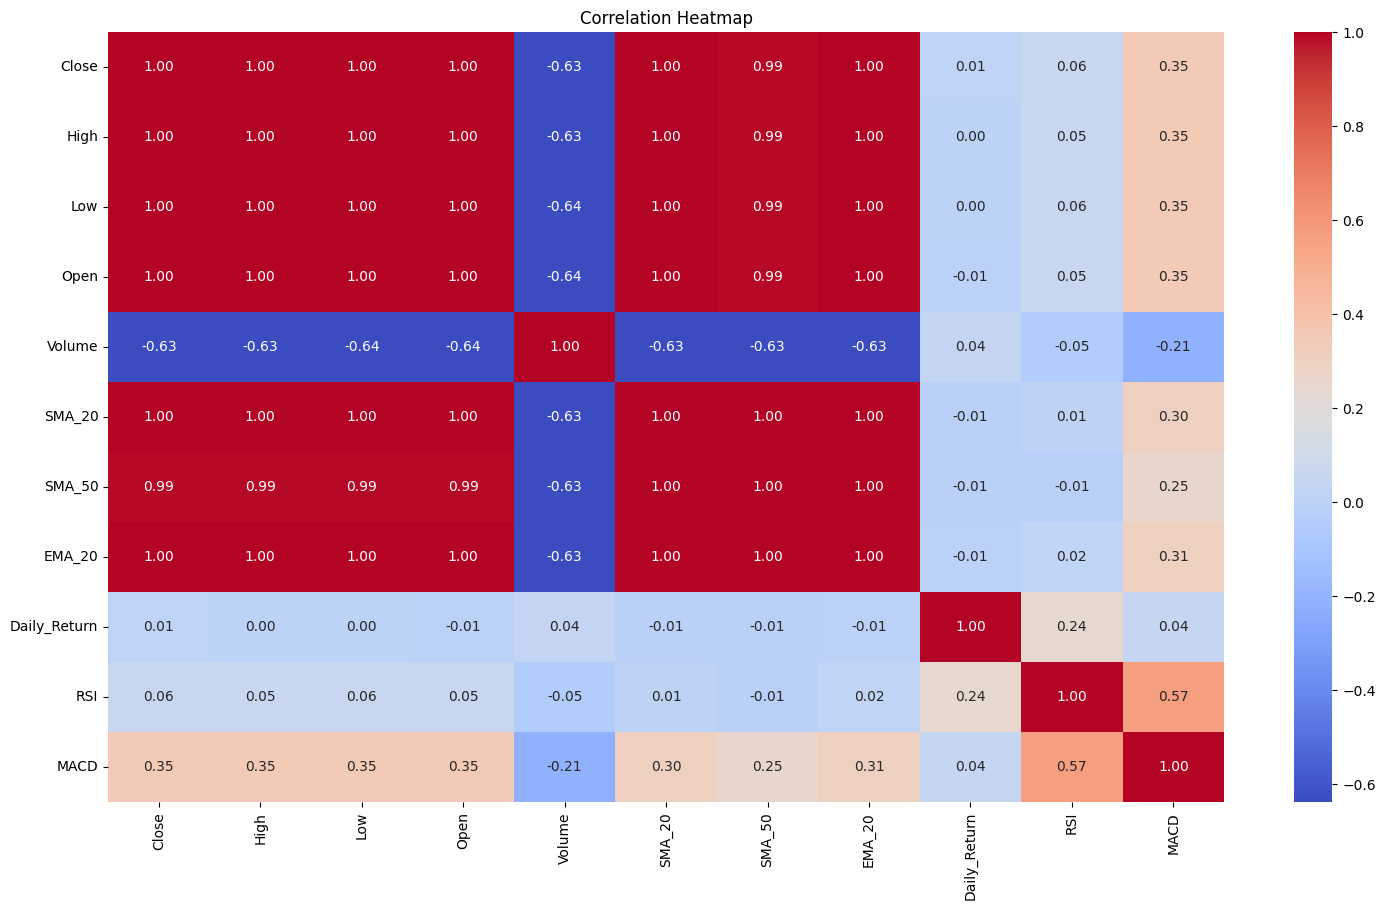

In [ ]:
#@title correlation matrix to understand the corelation between the data

correlation_matrix = df.select_dtypes(include=['number']).corr()

# Set the size of the figure
plt.figure(figsize=(18, 10))

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)

plt.show()

In [ ]:
#@title droping column that have correlation more than 0.95
# تحديد العتبة (أي عمودين الـ correlation بينهم أكبر من ده هنشيل واحد منهم)
threshold = 0.95

# حساب المصفوفة الخاصة بالـ correlation
corr_matrix = df.corr().abs()

# الاحتفاظ بالأعمدة اللي هنشيلها
to_drop = set()

# عمل loop للمقارنة بين الأعمدة
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)

# حذف الأعمدة المكررة
df_reduced = df.drop(columns=to_drop)

print(f"olumns deleted{to_drop}")
print(f"New shape of the data{df_reduced.shape}")


olumns deleted{'High', 'EMA_20', 'SMA_20', 'Low', 'SMA_50', 'Open'}
New shape of the data(3874, 6)


In [ ]:
df_reduced.columns

Index(['Date', 'Close', 'Volume', 'Daily_Return', 'RSI', 'MACD'], dtype='object')

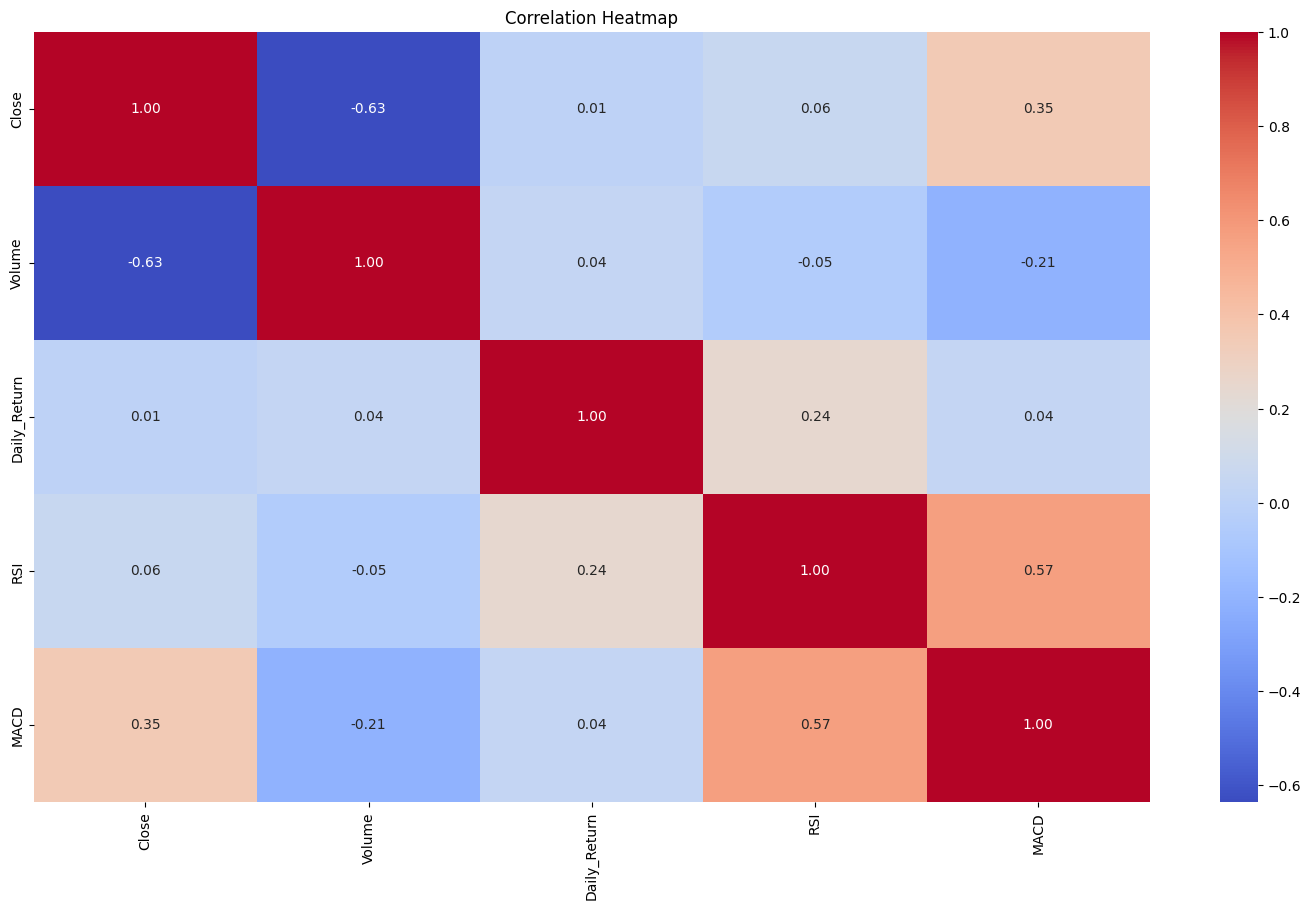

In [ ]:
#@title correlation matrix to understand the corelation between the data

correlation_matrix = df_reduced.select_dtypes(include=['number']).corr()

# Set the size of the figure
plt.figure(figsize=(18, 10))

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)

plt.show()

In [ ]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3874 entries, 50 to 3923
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3874 non-null   datetime64[ns]
 1   Close         3874 non-null   float64       
 2   Volume        3874 non-null   int64         
 3   Daily_Return  3874 non-null   float64       
 4   RSI           3874 non-null   float64       
 5   MACD          3874 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 211.9 KB


# **ML process**

In [ ]:
#@title dividing data to train and test
from sklearn.model_selection import train_test_split

# 1️⃣ تحديد الـ Features و الـ Target
X = df_reduced[['Volume', 'Daily_Return', 'RSI', 'MACD']]  # المدخلات
y = df_reduced['Close']  # المخرجات (الهدف)

# 2️⃣ تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3️⃣ عرض شكل البيانات
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (3099, 4) (3099,)
Testing set: (775, 4) (775,)


## **Linear regresion model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1️⃣ Create the model
model = LinearRegression()

# 2️⃣ Train the model on training data
model.fit(X_train, y_train)

# 3️⃣ Make predictions using test data
y_pred = model.predict(X_test)

# 4️⃣ Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 32658.285559583514
R-squared: 0.4960490206464613


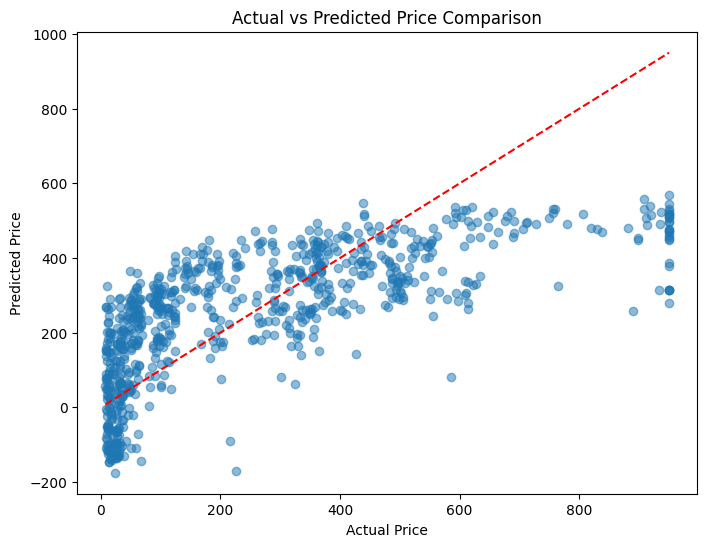

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price Comparison")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Ideal prediction line
plt.show()


In [ ]:
#@title VIF (Variance Inflation Factor)
# We calculate VIF to check if multicollinearity still exists in our features
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numerical columns (excluding Date)
X = df_reduced.drop(columns=["Date"])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


        Feature       VIF
0         Close  2.525002
1        Volume  2.873517
2  Daily_Return  1.027297
3           RSI  5.610334
4          MACD  1.460993


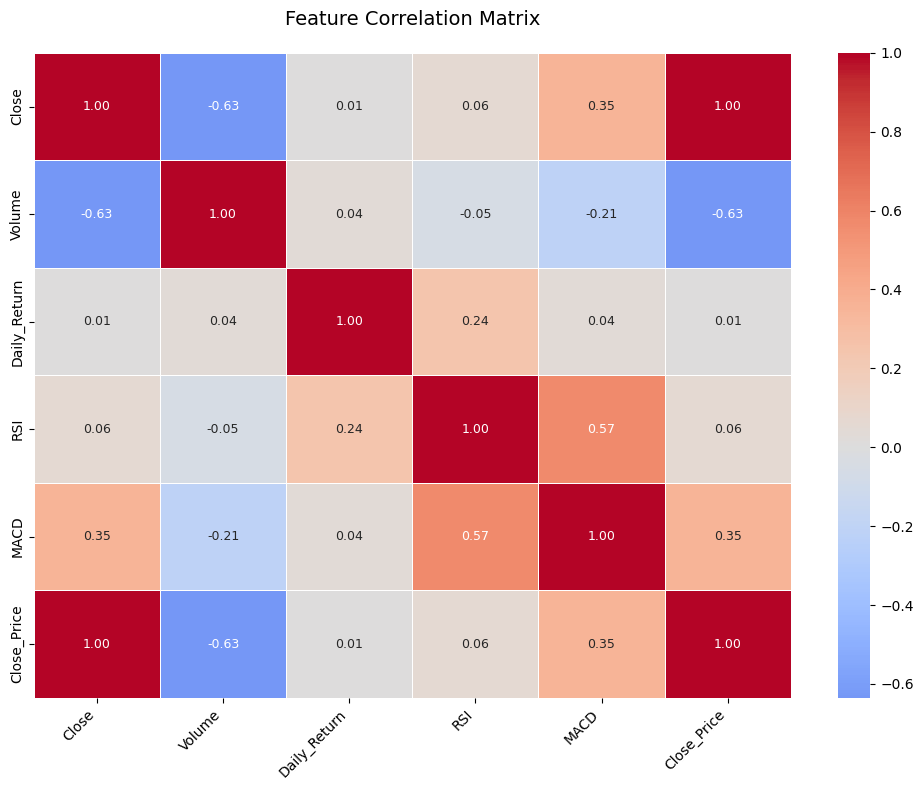

In [ ]:
# Merge features (X) with target (y) for correlation analysis
df_corr = X.copy()
df_corr['Close_Price'] = y  # Adding target variable

# Generate correlation matrix heatmap
plt.figure(figsize=(10, 8))  # Slightly larger figure for better readability
heatmap = sns.heatmap(
    df_corr.corr(),
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',  # Format to 2 decimal places
    linewidths=0.5,
    annot_kws={'size': 9}
)

# Customize the plot
plt.title("Feature Correlation Matrix", pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()


## Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create the Scaler
scaler = StandardScaler()

# Apply it to training data only
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
# Create the model
model_scaled = LinearRegression()

# Train on the Scaled data
model_scaled.fit(X_train_scaled, y_train)

# Prediction
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Performance evaluation
r2_scaled = r2_score(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))

print(f"R² after Scaling: {r2_scaled:.4f}")
print(f"RMSE after Scaling: {rmse_scaled:.4f}")


R² after Scaling: 0.4960
RMSE after Scaling: 180.7160


## **Ridge model**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge_model = Ridge(alpha=0.01)
scores = cross_val_score(ridge_model, X_train_scaled, y_train, scoring='r2', cv=5)
print(f"Average R² after reducing alpha: {np.mean(scores):.4f}")



Average R² after reducing alpha: 0.4617


# **Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Polynomial Regression pipeline
poly_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=4)),
    ('linear_reg', LinearRegression())
])

scores = cross_val_score(poly_model, X_train_scaled, y_train, scoring='r2', cv=5)
print(f"Average R2 with Polynomial Regression: {np.mean(scores):.4f}")


Average R2 with Polynomial Regression: 0.7522


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Create the model
rf_model = RandomForestRegressor(random_state=42)

# Evaluate using Cross Validation
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

print("Random Forest R² for each fold:", rf_scores)
print("Average R²:", np.mean(rf_scores))

Random Forest R² for each fold: [0.77245149 0.73805635 0.78543982 0.76903536 0.74841503]
Average R²: 0.7626796109479606


# **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the model
gb_model = GradientBoostingRegressor(random_state=42)

# Evaluate using Cross Validation
gb_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='r2')

print("Gradient Boosting R² for each fold:", gb_scores)
print("Average R²:", np.mean(gb_scores))


Gradient Boosting R² for each fold: [0.77571228 0.72453057 0.77216679 0.75837537 0.74700861]
Average R²: 0.7555587240564989


# **comaprision betweeen models**

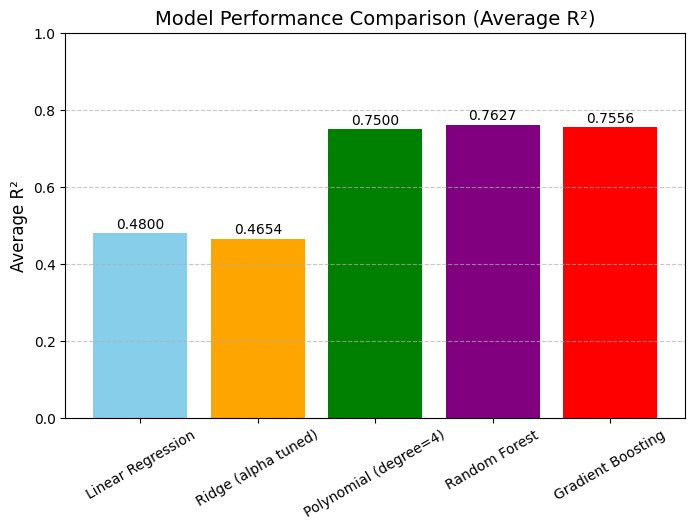

In [ ]:
#@title Comparison between models

# Model names
models = ['Linear Regression', 'Ridge (alpha tuned)', 'Polynomial (degree=4)', 'Random Forest', 'Gradient Boosting']

# Average R² for each model
r2_scores = [0.48, 0.4654, 0.75, 0.7627, 0.7556]

# Plot the chart
plt.figure(figsize=(8,5))
bars = plt.bar(models, r2_scores, color=['skyblue', 'orange', 'green', 'purple', 'red'])

# Add values on top of bars
for bar, score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f"{score:.4f}",
             ha='center', va='bottom', fontsize=10)

# Configure the plot
plt.ylim(0, 1)  # R² scale from 0 to 1
plt.ylabel('Average R²', fontsize=12)
plt.title('Model Performance Comparison (Average R²)', fontsize=14)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


        Actual   Predicted
0   759.440002  717.917543
1   949.998925  875.594324
2   377.339996  244.651899
3   380.070007  464.897565
4   347.570007  407.206975
5   552.159973  400.065299
6   586.340027  198.590615
7    53.847141   62.314428
8   341.309998  361.813703
9   198.979996  324.915702
10  613.520020  156.025814
11   14.778571   24.349014
12   37.848572   31.106100
13  395.420013  458.676803
14  171.000000  176.597670
15  122.739998  236.366698
16   87.970001  117.316286
17   50.432858   54.453600
18   14.570000   88.013170
19  174.690002  313.820430


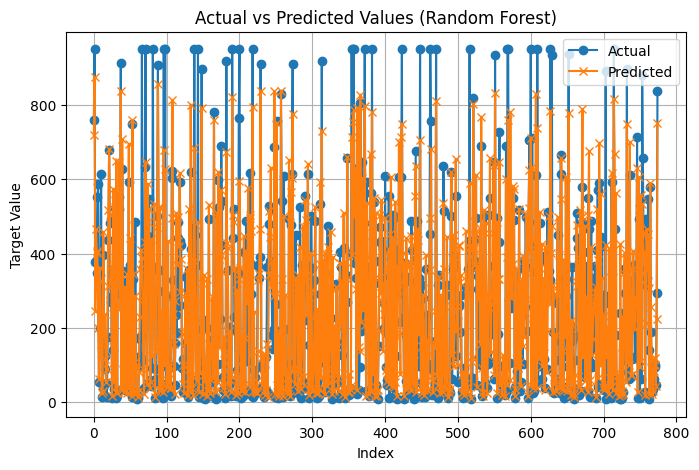

In [ ]:
import pandas as pd

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict for the test data
y_pred = rf_model.predict(X_test)

# Create a DataFrame to compare actual vs predicted
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}).reset_index(drop=True)

# Display the first 20 rows
print(results_df.head(20))

# Optional: Save results to Excel
results_df.to_excel("predictions_vs_actual.xlsx", index=False)

# Optional: Plot actual vs predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(results_df['Actual'].values, label='Actual', marker='o')
plt.plot(results_df['Predicted'].values, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()



# **Finish**

In [ ]:
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor

# # تدريب الموديل
# # Assuming rf_model is already trained on X_train and y_train from the previous cells
# # rf_model = RandomForestRegressor(random_state=42)
# # rf_model.fit(X_train, y_train)  # هنا y_train هو Close

# # اختيار آخر 7 أيام
# last_7_days = df_reduced.tail(7).copy()

# # تجهيز البيانات بدون عمود Close و الأعمدة اللي مش موجودة في بيانات التدريب
# X_last_7 = last_7_days.drop(columns=['Close', 'Date', 'Days'])

# # التنبؤ
# last_7_days['Prediction'] = rf_model.predict(X_last_7)

# # عرض النتائج
# print(last_7_days[['Close', 'Prediction']])

# # Optional: Save results to Excel
# results_df = last_7_days[['Close', 'Prediction']]
# results_df.to_excel("predictions_vs_actual.xlsx", index=False)

# # Optional: Plot actual vs predicted
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 5))
# plt.plot(last_7_days.index, last_7_days['Close'].values, label='Actual', marker='o')
# plt.plot(last_7_days.index, last_7_days['Prediction'].values, label='Predicted', marker='x')
# plt.title('Actual vs Predicted Values (Random Forest)')
# plt.xlabel('Index')
# plt.ylabel('Target Value')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# # عدد الأيام اللي هنعمل لها lag
# n_lags = 3

# # for lag in range(1, n_lags+1):
#     df_reduced[f'Close_lag_{lag}'] = df_reduced['Close'].shift(lag)

# # إزالة الصفوف اللي فيها NaN بعد الـ shift
# df.dropna(inplace=True)

# df.head()
